### Job description screening by NLP
- load job description in google sheet and use ML model to summarize words
- Information Extraction


In [0]:
#importing all required libraries
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

#import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import matplotlib.pyplot as plt

import nltk #NLP data processing library (IMDB)
from nltk import word_tokenize, sent_tokenize

import numpy as np
import nltk #NLP data processing library (IMDB)
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases # phraser optimizes phrases
from keras.preprocessing.text import one_hot # relation
import spacy #use NLP functions
from spacy import displacy
from textblob import TextBlob
import tweepy #tweeter python package
import re
import en_core_web_sm #(python -m spacy download en_core_web_lg) # pre-train model sm: small

import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure

import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases # phraser optimizes phrases
from keras.preprocessing.text import one_hot # relation


In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_7xr5Wfe1Zxz31fRAg4HxM7579p7pLyv2DQeynqAeNQ/edit?folder=1Zdk9qp8mD6x93sdLr14SMf-iczSrlrsP#gid=0')

In [0]:
sheet = wb.worksheet('Sheet1')

In [0]:
data = sheet.get_all_values()

In [50]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df=df.reset_index(drop=True)
df.head()

,Financial,Healthcare,e-com,social media,consumer,Information
0,"Two Sigma, The Alpha Insights team at Two Sigm...","Novo Nordisk, The Clinical, Medical and Regula...",Walmart Position Description\n\nA Staff Data S...,"Facebook, We’re looking for Data Scientists to...","Uniliever, Background & Purpose of the Job\n\n...","Google, Note: By applying to this position you..."
1,"Prudential Financial,\n\nAs we create a divers...","Aetna, Description:\r\nIt’s a new day in healt...","Walmart, As a part of Walmart’s Customer Data ...","Facebook, With over 2.1 billion people, our co...",,
2,Machine Learning Research Scientist - Pattern ...,"Blink Health, Blink Health ( https://www.blink...","Amazon, Description\r\n\r\nAre you seeking an ...","New York Times, The New York Times is a techno...",,
3,"Venmo, About Us\r\n\r\nVenmo was founded on th...","Oscar, Hi, we're Oscar. We're hiring a Data Sc...","Amazon, Description\r\n\r\nAmazon is looking f...","Wolters Kluwer, Data Scientist – R0006015\n\nW...",,
4,"Sofi, Who We Are\r\n\r\nSoFi is a digital pers...","Oscar, Hi, we're Oscar. We're hiring a Data Sc...","Amazon, Where will Amazon's growth come from i...","Bloomberg, News and social media move financia...",,


In [133]:
# print stop words from spacy
nlp = en_core_web_sm.load()  # spacy language model
stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(stopwords)

#nltk.download('stopwords')
#stpwrds = stopwords.words('english') + list(string.punctuation) # words occur too much

{'up', 'too', 'after', 'whither', 'nor', '’d', 'behind', 'former', 'amount', 'hence', 'neither', 'any', 'them', 'yours', 'perhaps', 'alone', "n't", 'latterly', 'due', 'him', 'nine', 'regarding', 'sometime', 'off', 'becomes', 'made', 'afterwards', 'enough', 'how', 'none', 'first', 'hereupon', 'anyhow', 'noone', 'thereby', "'ve", 'again', 'every', 'toward', 'be', 'below', 'then', 'make', 'not', 'such', 'are', 'with', 'yourselves', 'if', 're', 'last', '‘ve', 'is', 'less', 'and', 'therefore', 'whereby', 'did', 'two', 'over', 'although', 'many', 'must', 'they', 'you', 'ourselves', 'into', 'but', 'here', 'along', 'beyond', 'by', "'ll", 'anywhere', '‘s', 'himself', 'at', 'everywhere', 'before', 'keep', 'moreover', 'most', 'only', 'often', 'so', 'whenever', 'throughout', 'no', 'amongst', 'whose', 'mostly', 'various', 'he', 'why', 'out', '‘ll', 'seem', 'become', 'nowhere', 'say', 'ten', 'upon', 'everyone', 'until', 'which', 'hereafter', 'another', 'an', 'herself', 'will', 'to', "'re", 'us', 'to

In [138]:
df.shape[0]

(8, 7)

In [0]:
df_clean = df.copy()

In [142]:
# word split
for names in df.columns:
  for i in range(len(df[names])):
    df_clean[names][i] = df[names][i].split()

df_clean.head()

,Financial,Healthcare,e-com,social media,consumer,Information,Financial_clean
0,"[Two, Sigma,, The, Alpha, Insights, team, at, ...","[Novo, Nordisk,, The, Clinical,, Medical, and,...","[Walmart, Position, Description, A, Staff, Dat...","[Facebook,, We’re, looking, for, Data, Scienti...","[Uniliever,, Background, &, Purpose, of, the, ...","[Google,, Note:, By, applying, to, this, posit...","[Two, Sigma,, The, Alpha, Insights, team, at, ..."
1,"[Prudential, Financial,, As, we, create, a, di...","[Aetna,, Description:, It’s, a, new, day, in, ...","[Walmart,, As, a, part, of, Walmart’s, Custome...","[Facebook,, With, over, 2.1, billion, people,,...",[],[],"[Prudential, Financial,, As, we, create, a, di..."
2,"[Machine, Learning, Research, Scientist, -, Pa...","[Blink, Health,, Blink, Health, (, https://www...","[Amazon,, Description, Are, you, seeking, an, ...","[New, York, Times,, The, New, York, Times, is,...",[],[],"[Machine, Learning, Research, Scientist, -, Pa..."
3,"[Venmo,, About, Us, Venmo, was, founded, on, t...","[Oscar,, Hi,, we're, Oscar., We're, hiring, a,...","[Amazon,, Description, Amazon, is, looking, fo...","[Wolters, Kluwer,, Data, Scientist, –, R000601...",[],[],"[Venmo,, About, Us, Venmo, was, founded, on, t..."
4,"[Sofi,, Who, We, Are, SoFi, is, a, digital, pe...","[Oscar,, Hi,, we're, Oscar., We're, hiring, a,...","[Amazon,, Where, will, Amazon's, growth, come,...","[Bloomberg,, News, and, social, media, move, f...",[],[],"[Sofi,, Who, We, Are, SoFi, is, a, digital, pe..."


In [0]:
def word_clean(df, columns):
  '''
  input: dataset and column name
  output: lowercase word without stop words
  '''
  df_clean = []
  for discription in df1[columns]:
    #lower_words = []
    for word in discription:
      if not word.lower() in stopwords1:
        #lower_words.append(word.lower())
        df_clean.append(word.lower())
    #df_clean.append(lower_words)
  return df_clean


In [217]:
word_clean(df_clean, 'Healthcare')

['novo',
 'nordisk,',
 'clinical,',
 'medical',
 'regulatory',
 '(cmr)',
 'department',
 'novo',
 'nordisk',
 'diverse',
 'collaborative',
 'groups',
 'organization.',
 'health-care-provider',
 'interactions',
 'developing',
 'implementing',
 'regulatory',
 'strategies',
 'fda',
 'providing',
 'medical',
 'education',
 'collecting',
 'data',
 'support',
 'efficacy',
 'new',
 'product',
 'development,',
 'cmr',
 'involved.',
 'thing',
 'keeps',
 'marching',
 'beat',
 'patient-centered',
 'focus.',
 'novo',
 'nordisk,',
 'help',
 'patients',
 'world.',
 'needs',
 'evolve,',
 'challenge',
 'find',
 'better',
 'innovative',
 'ways',
 'improve',
 'quality',
 'life.',
 'we’re',
 'changing',
 'lives',
 'living.',
 'ready',
 'difference?',
 'position',
 'data',
 'scientist',
 'identifies',
 'delivers',
 'dynamic',
 'reliable',
 'analytics',
 'products',
 'services',
 'leveraging',
 'internal',
 'external',
 'data',
 'enable',
 'faster',
 'decision',
 'making',
 'novo',
 'nordisk;',
 'contribut

In [179]:
#word_clean(df1, 'Financial');
# check stop words
w = ['(1)', '(2)','(3)','&', 'r,)','(e.g.','e.g.','etc.).','ms','3-5','3','r,','3+','â©','2+']
stopwords1 = list(stopwords)+(w)
#for i in w:
#  nlp.vocab[i].is_stop = True
#nlp.vocab['christchurch'].is_stop = True
#nlp.vocab['new zealand'].is_stop = True


TypeError: ignored

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from collections import Counter

In [0]:
reindexed_data = np.array(word_clean(df_clean, 'Healthcare'))
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data#.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [0]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [0]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [0]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [0]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [224]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  data driven addition
Topic 2:  experience datasets text
Topic 3:  analytics oscar analysis
Topic 4:  health models care
Topic 5:  work product business
Topic 6:  new team projects


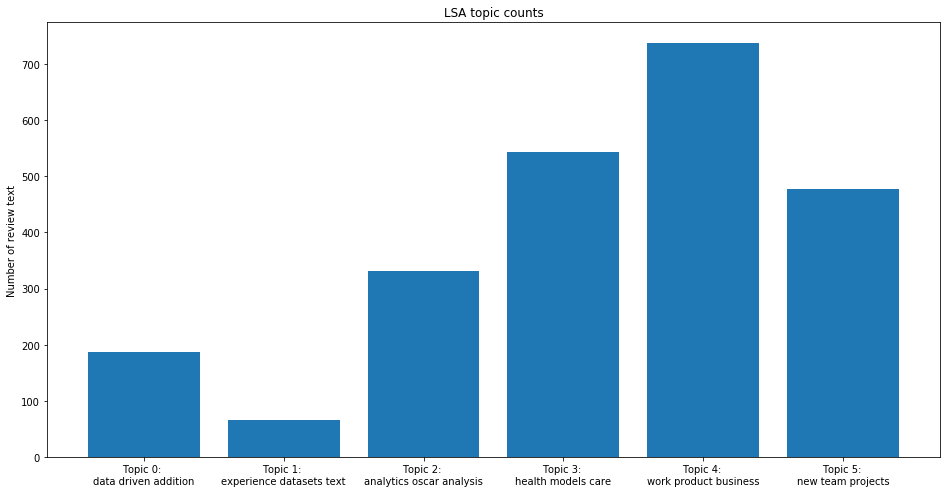

In [225]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [0]:
df_hc = pd.DataFrame(word_clean(df_clean, 'Healthcare'), columns=['names'])

In [230]:
df_hc.head()

,names
0,novo
1,"nordisk,"
2,"clinical,"
3,medical
4,regulatory


In [231]:
df_hc['names'].value_counts().nlargest(20)

data           66
experience     35
analytics      26
work           26
new            25
health         25
product        19
team           18
statistical    15
business       15
strong         11
healthcare     11
years          11
develop        10
care           10
models         10
development    10
people         10
analysis        9
-               9
Name: names, dtype: int64